['2017 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2014 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2018 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2019 Daytona 500 Loop Data Results - Daytona International Speedway.csv', '2012 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2013 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2021 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2020 Daytona 500 Loop Data Results - Daytona International Speedway.csv', '2015 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv', '2016 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


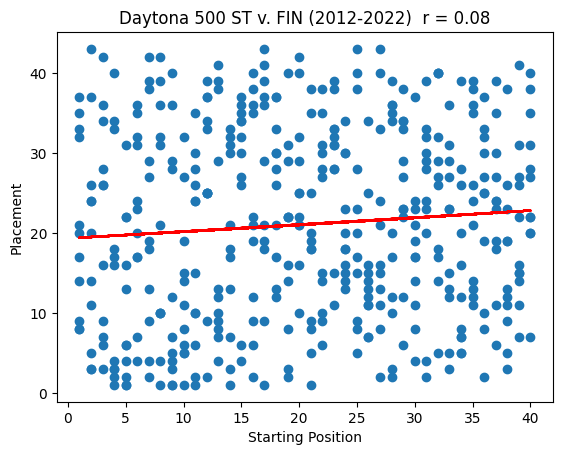

Mode: 
5
Range: 
4 - 21
Median Winner ST: 
9.0
Mean Winner ST: 
10.272727272727273
SD Winner ST: 
5.028842431250665


,FIN,ST
0,1,5
40,1,8
80,1,9
124,1,14
180,1,10
204,1,4
247,1,9
290,1,17
345,1,21
370,1,5


In [132]:
import os as os
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import linear_model

df = pd.read_csv(
    "2022 NASCAR Cup Series Daytona 500 Race Results - Daytona International Speedway.csv")

files = os.listdir("data")

print(files)

for x in files:
    df = df.merge(pd.read_csv("data/" + x), how="outer")

    
df = df.filter(["FIN", "ST"])

df = df[df["ST"]  < 41]

X = df.iloc[:, 1].values.reshape(-1, 1)
Y = df.iloc[:, 0].values.reshape(-1, 1)


linear_regressor = linear_model.PoissonRegressor()
linear_regressor.fit(X, Y)


Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Starting Position")
plt.ylabel("Placement")
plt.title("Daytona 500 ST v. FIN (2012-2022)  r = 0.08")
plt.show()


df = df[df["FIN"] == 1]

print("Mode: ")
print("5")
print("Range: ")
print("4 - 21")
print("Median Winner ST: ")
print(np.median(df["ST"]))
print("Mean Winner ST: ")
print(np.mean(df["ST"]))
print("SD Winner ST: ")
print(np.std(df["ST"]))

df